In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d # 绘制三维图形
path = 'exedata2.txt'
data = pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])

#### Size和Bedrooms特征尺寸相差很大，需要进行均值归一化

In [178]:
data = (data - data.mean()) / (data.std()) #pandas 可对所有特征和输出结果一次性全部均值归一化
data.insert(0,'Ones',1)

In [179]:
# 处理X y
cols = data.shape[1]
cols
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values) # Datafram->ndarray->matrix
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))
alpha = 0.01
iters = 1000

In [180]:
def computeCost(X,y,theta):
    inner = np.power((X * theta.T - y),2)
    return np.sum(inner) / (2*len(X))

In [181]:
def gradientDescent(X,y,theta,alpha,iters):
    cost = np.zeros(iters)
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    for i in range(iters):
        for j in range(parameters):
            term = np.multiply((X * theta.T - y), X[:,j])
            temp[0,j] = theta[0,j] - alpha/len(X) * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

(Text(0.5, 0, 'Size'), Text(0.5, 0.5, 'Bedrooms'))

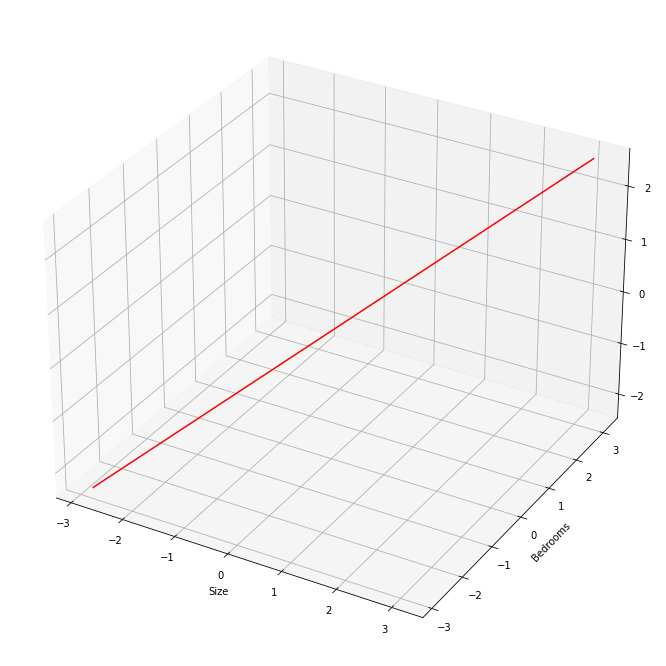

In [182]:
theta,cost = gradientDescent(X,y,theta,alpha,iters)
x1 = np.linspace(X.min(),X.max(),100)
x2 = np.linspace(X.min(),X.max(),100)
y = theta[0,0] + theta[0,1]*x1 + theta[0,2]*x2
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(x1,x2,y,'r')
plt.xlabel('Size'),plt.ylabel('Bedrooms')

Text(0.5, 1.0, 'Error vs. Training Epoch')

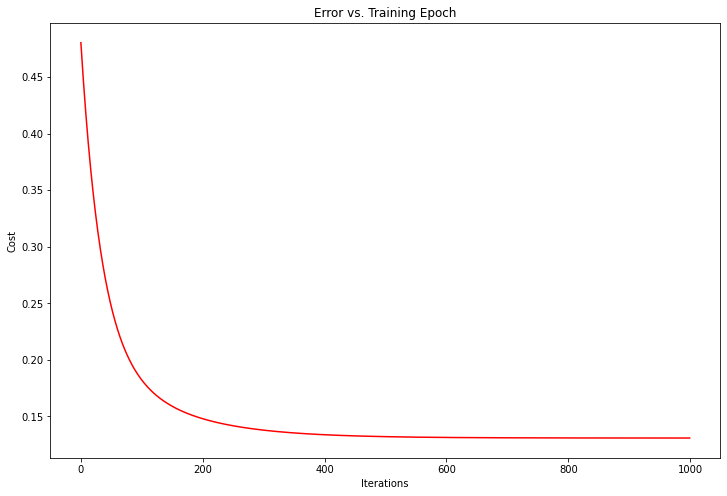

In [183]:
# 梯度下降过程
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters),cost,'r')
plt.xlabel('Iterations'),plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')